In [5]:
import numpy as np
from scipy import signal, misc, ndimage
from skimage import filters, feature, img_as_float
from skimage.io import imread
from skimage.color import rgb2gray
from PIL import Image, ImageFilter
import matplotlib.pylab as pylab

In [6]:

def plot_image(image,title):
    pylab.imshow(image),pylab.title(title,size=20)
    pylab.axis('off')

<Figure size 432x288 with 0 Axes>

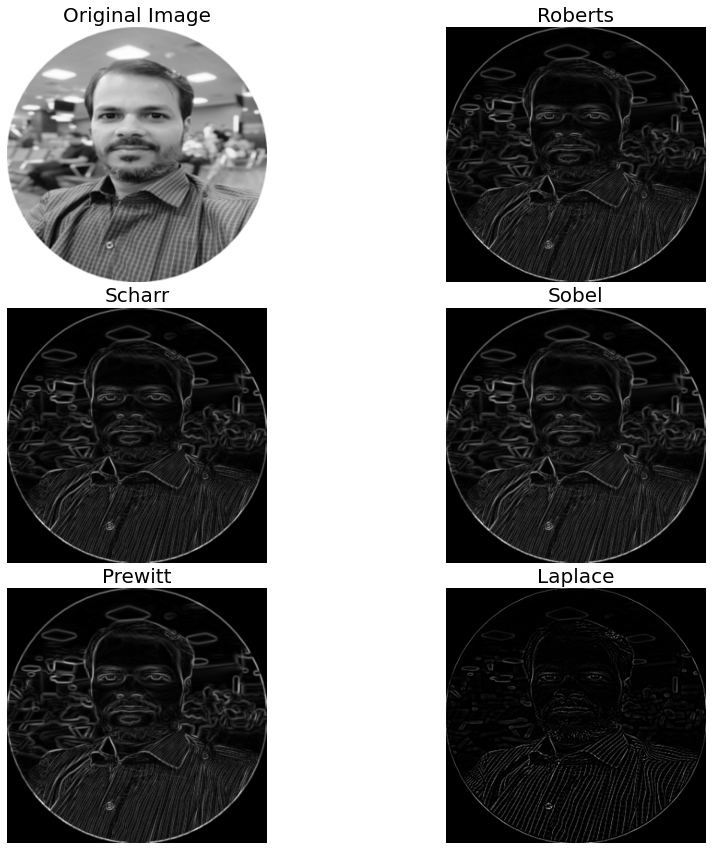

In [7]:

im=Image.open('images/rajesh.png').convert('L')
pylab.gray()
pylab.figure(figsize=(15,15))
pylab.subplot(3,2,1), plot_image(im,'Original Image')
edges=filters.roberts(im)
pylab.subplot(3,2,2), plot_image(edges,'Roberts')

edges=filters.scharr(im)
pylab.subplot(3,2,3), plot_image(edges,'Scharr')

edges=filters.sobel(im)
pylab.subplot(3,2,4), plot_image(edges,'Sobel')

edges=filters.prewitt(im)
pylab.subplot(3,2,5), plot_image(edges,'Prewitt')

edges=np.clip(filters.laplace(im), 0,1)
pylab.subplot(3,2,6), plot_image(edges,'Laplace')
pylab.subplots_adjust(wspace=0.1,hspace=0.1)
pylab.show()
                                 
                        



<Figure size 432x288 with 0 Axes>

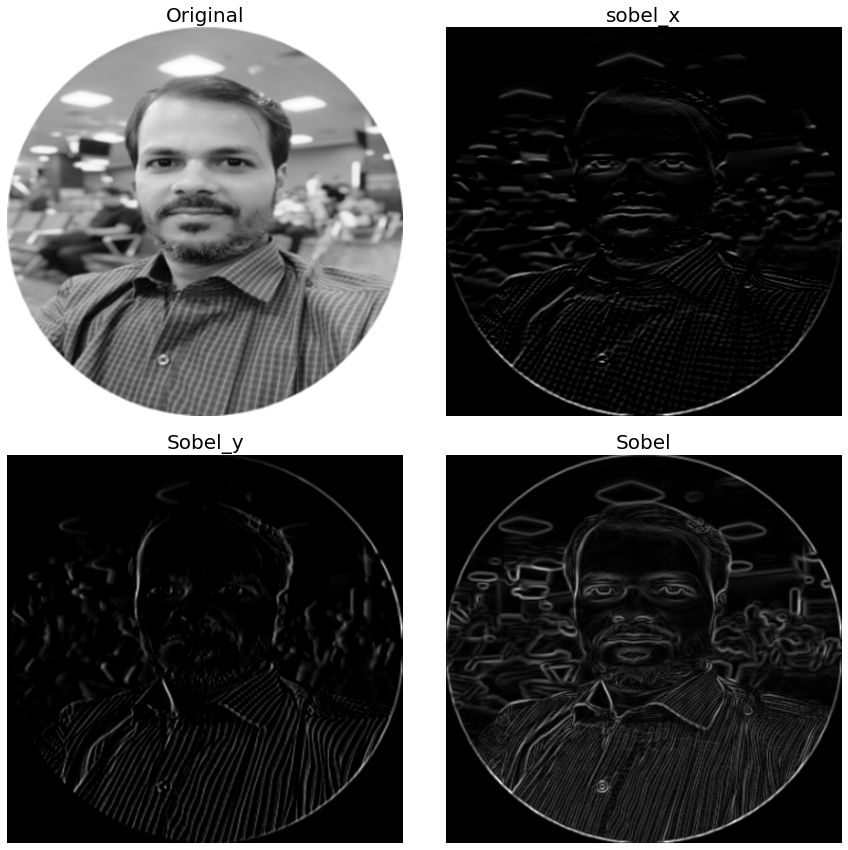

In [8]:

im=Image.open('images/rajesh.png').convert('L')
pylab.gray()
pylab.figure(figsize=(15,15))
pylab.subplot(2,2,1), plot_image(im,'Original')

pylab.subplot(2,2,2)
edges_x=filters.sobel_h(im)
plot_image(np.clip(edges_x,0,1),'sobel_x')

pylab.subplot(2,2,3)
edges_y=filters.sobel_v(im)
plot_image(np.clip(edges_y,0,1),'Sobel_y')

pylab.subplot(2,2,4)
edges=filters.sobel(im)
plot_image(np.clip(edges,0,1),'Sobel')

pylab.subplots_adjust(wspace=0.1,hspace=0.1)
pylab.show()

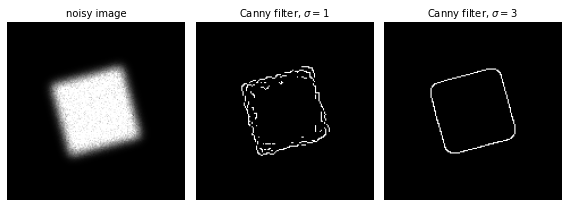

In [9]:

import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from skimage.util import random_noise
from skimage import feature


image = np.zeros((128, 128), dtype=float)
image[32:-32, 32:-32] = 1

image = ndi.rotate(image, 15, mode='constant')
image = ndi.gaussian_filter(image, 4)
image = random_noise(image, mode='speckle', mean=0.05)


edges1 = feature.canny(image)
edges2 = feature.canny(image, sigma=3)



fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(8, 3))

ax[0].imshow(image, cmap='gray')
ax[0].set_title('noisy image', fontsize=10)

ax[1].imshow(edges1, cmap='gray')
ax[1].set_title(r'Canny filter, $\sigma=1$', fontsize=10)

ax[2].imshow(edges2, cmap='gray')
ax[2].set_title(r'Canny filter, $\sigma=3$', fontsize=10)


for a in ax:
    a.axis('off')

fig.tight_layout()
plt.show()
